In [1]:
%matplotlib inline

### load the modules
(if you are using astropy verion older than 1.0.5, below you may see a warning about IPython.kernel being deprecated. See https://github.com/astropy/astropy/pull/4078 )

In [2]:
from cwfsInstru import cwfsInstru
from cwfsAlgo import cwfsAlgo
from cwfsImage import cwfsImage
import cwfsPlots as plot

/Applications/miniconda/envs/p3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


### Define the image objects. Input arguments: file name, field coordinates in deg, image type

In [3]:
I1=cwfsImage('./testImages/LSST_NE_SN25/z11_0.25_intra.txt',[1.185,1.185],'intra')
I2=cwfsImage('./testImages/LSST_NE_SN25/z11_0.25_extra.txt',[1.185,1.185],'extra')

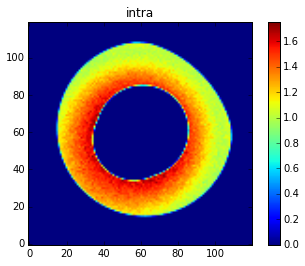

In [4]:
plot.plotImage(I1.image,'intra')

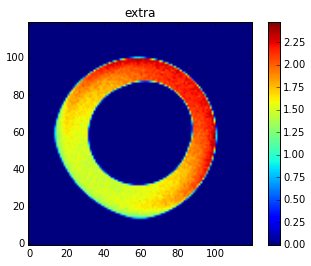

In [5]:
plot.plotImage(I2.image,'extra')

### Define the instrument. Input arguments: instrument name, size of image stamps

In [6]:
inst=cwfsInstru('lsst',I1.sizeinPix)

### Define the algorithm being used. Input arguments: baseline algorithm, instrument, debug level

In [7]:
algo=cwfsAlgo('exp',inst,0)

### Run it

In [8]:
algo.runIt(inst,I1,I2,'offAxis')

### Print the Zernikes Zn (n>=4)

In [9]:
print(algo.zer4UpNm)

[   2.59351588   14.10235606   -8.46968413    3.67630955    1.46655994
   -9.72420286    8.20734676 -192.83918198    0.97790453    1.5681737
    4.19718439   -0.39186716    1.55105036    1.23529318   -1.69943129
    2.1400894    -0.29556192   -2.11321047    1.18836412]


### plot the Zernikes Zn (n>=4)

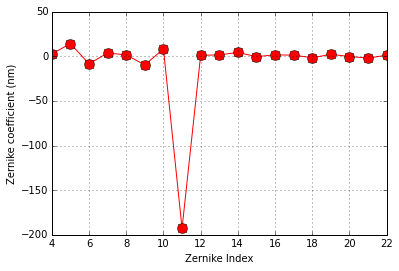

In [10]:
plot.plotZer(algo.zer4UpNm,'nm')

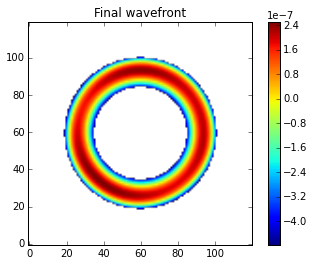

In [12]:
plot.plotImage(algo.Wconverge,'Final wavefront')

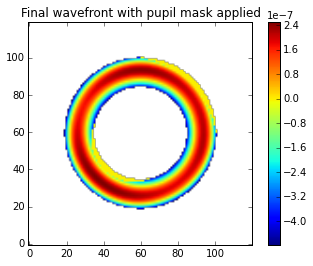

In [15]:
plot.plotImage(algo.Wconverge*algo.pMask,'Final wavefront with pupil mask applied')